# Monte Carlo Method

Monte Carlo Method is a computational algorithm that uses randomness to arrive into a deterministic(numeric) result. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random

Using a circle inside a square illustration, let us demonstrait the monte carlo method. Assuming that we know the are of a square, let us try to compute the area of the circle without using the area of a circle formula. 

In [2]:
def square_coordinates(x):
    #Points to be used in creating a square
    x_values = [-x, x, x, -x, -x]
    y_values = [x, x, -x, -x, x]
    return x_values,y_values

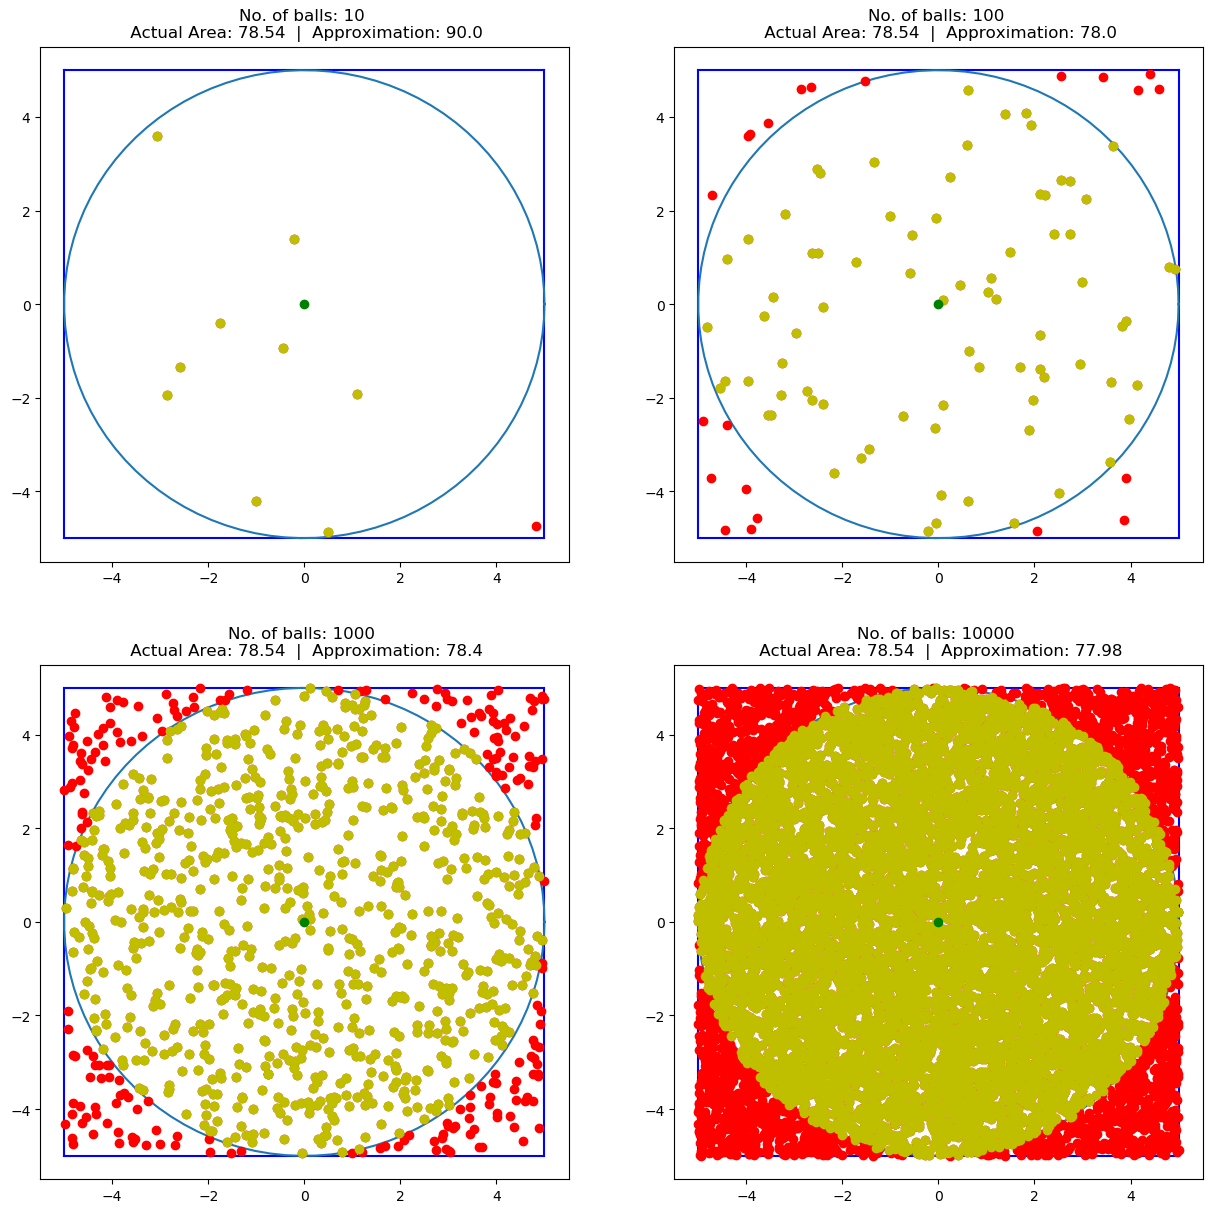

In [3]:
side = 5 #Let's assume this is in centimeters
x, y = square_coordinates(side)
ns = [10, 100, 1000, 10000]
fig, axes = plt.subplots(2,2,figsize = (15,15), dpi = 100)
ax = axes.flatten()
for index,n in enumerate(ns):
    
    #Plotting the square
    for i in np.arange(0,len(x)):
        ax[index].plot(x[i:i+2], y[i:i+2], color = "blue")

    #Plotting the circle
    theta = np.linspace(0, 2*np.pi, 100)
    r = 5
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    ax[index].plot(x1,x2)

    #Generating n number of balls to fill in the figures
    random_values_x = np.random.uniform(-5,5,n)
    random_values_y = np.random.uniform(-5,5,n)
    
    #Taking balls inside the circle
    circle_indexes = [list(random_values_y).index(j) for i,j in zip(random_values_x,random_values_y) if np.sqrt(i**2+j**2)<=5]
    y_circle = random_values_y[circle_indexes]
    x_circle = random_values_x[circle_indexes]

    #Plotting
    ax[index].plot(random_values_x,random_values_y, 'o',color = 'r')
    ax[index].plot(x_circle, y_circle, 'o',color = 'y')
    ax[index].plot(0,0,'o',color = 'green')

    square_area = 100
    b_all = n
    b_circle = len(circle_indexes)
    circle_area = (b_circle*square_area)/b_all
    actual_circle_area = np.pi * ((10/2)**2)
    ax[index].set_title("No. of balls: {} \n Actual Area: {}  |  Approximation: {}".format(n,np.round(actual_circle_area,2),np.round(circle_area,2)))



As observed, the more uniformly random balls that we use, the closer we get to the true value. 